# Credit Card Fraud Detection

### Import statements

In [ ]:
# Import necessary libraries
import polars as pl  # I tend to use Polars instead of Pandas for the speed. I can use pandas if required though!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pl.read_csv("data/creditcard_2023.csv")

In [143]:
df.head()

id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.98702,0.293438,-0.941386,0.54902,1.804879,0.215598,0.512307,0.333644,0.12427,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.12628,-0.434824,-0.08123,-0.151045,17982.1,0
1,0.9851,-0.356045,0.558056,-0.429654,0.27714,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.40381,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.19009,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.00502,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.74684,-1.090178,0.249486,1.143312,0.518269,-0.06513,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.34506,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.51595,-0.165316,0.048424,5384.44,0
4,-0.20682,-0.16528,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.21266,1.049921,0.968046,-1.203171,1.029577,1.43931,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Preprocessing

In [144]:
# Check for null values and basic data structure
df.null_count()

id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
# Explore the distribution of the target variable ('Class')
df["Class"].value_counts()

Class,count
i64,u32
0,284315
1,284315


In [146]:
# Separate features and target variable
x = df.drop("Class")
y = df["Class"]

In [147]:
# Split data into training (70%) and testing (30%) sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, shuffle=True, random_state=42)

### EDA

In [148]:
df

id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.98702,0.293438,-0.941386,0.54902,1.804879,0.215598,0.512307,0.333644,0.12427,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.12628,-0.434824,-0.08123,-0.151045,17982.1,0
1,0.9851,-0.356045,0.558056,-0.429654,0.27714,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.40381,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.19009,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.00502,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.74684,-1.090178,0.249486,1.143312,0.518269,-0.06513,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.34506,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.51595,-0.165316,0.048424,5384.44,0
4,-0.20682,-0.16528,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.21266,1.049921,0.968046,-1.203171,1.029577,1.43931,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.3305,-1.58073,-1.363454,0.287766,-1.480796,-1.520928,-1.37697,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.13366,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.17359,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.55026,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.4,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.6061,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.2111,-0.448909,0.540073,-0.755836,-0.48754,-0.268741,23572.85,1


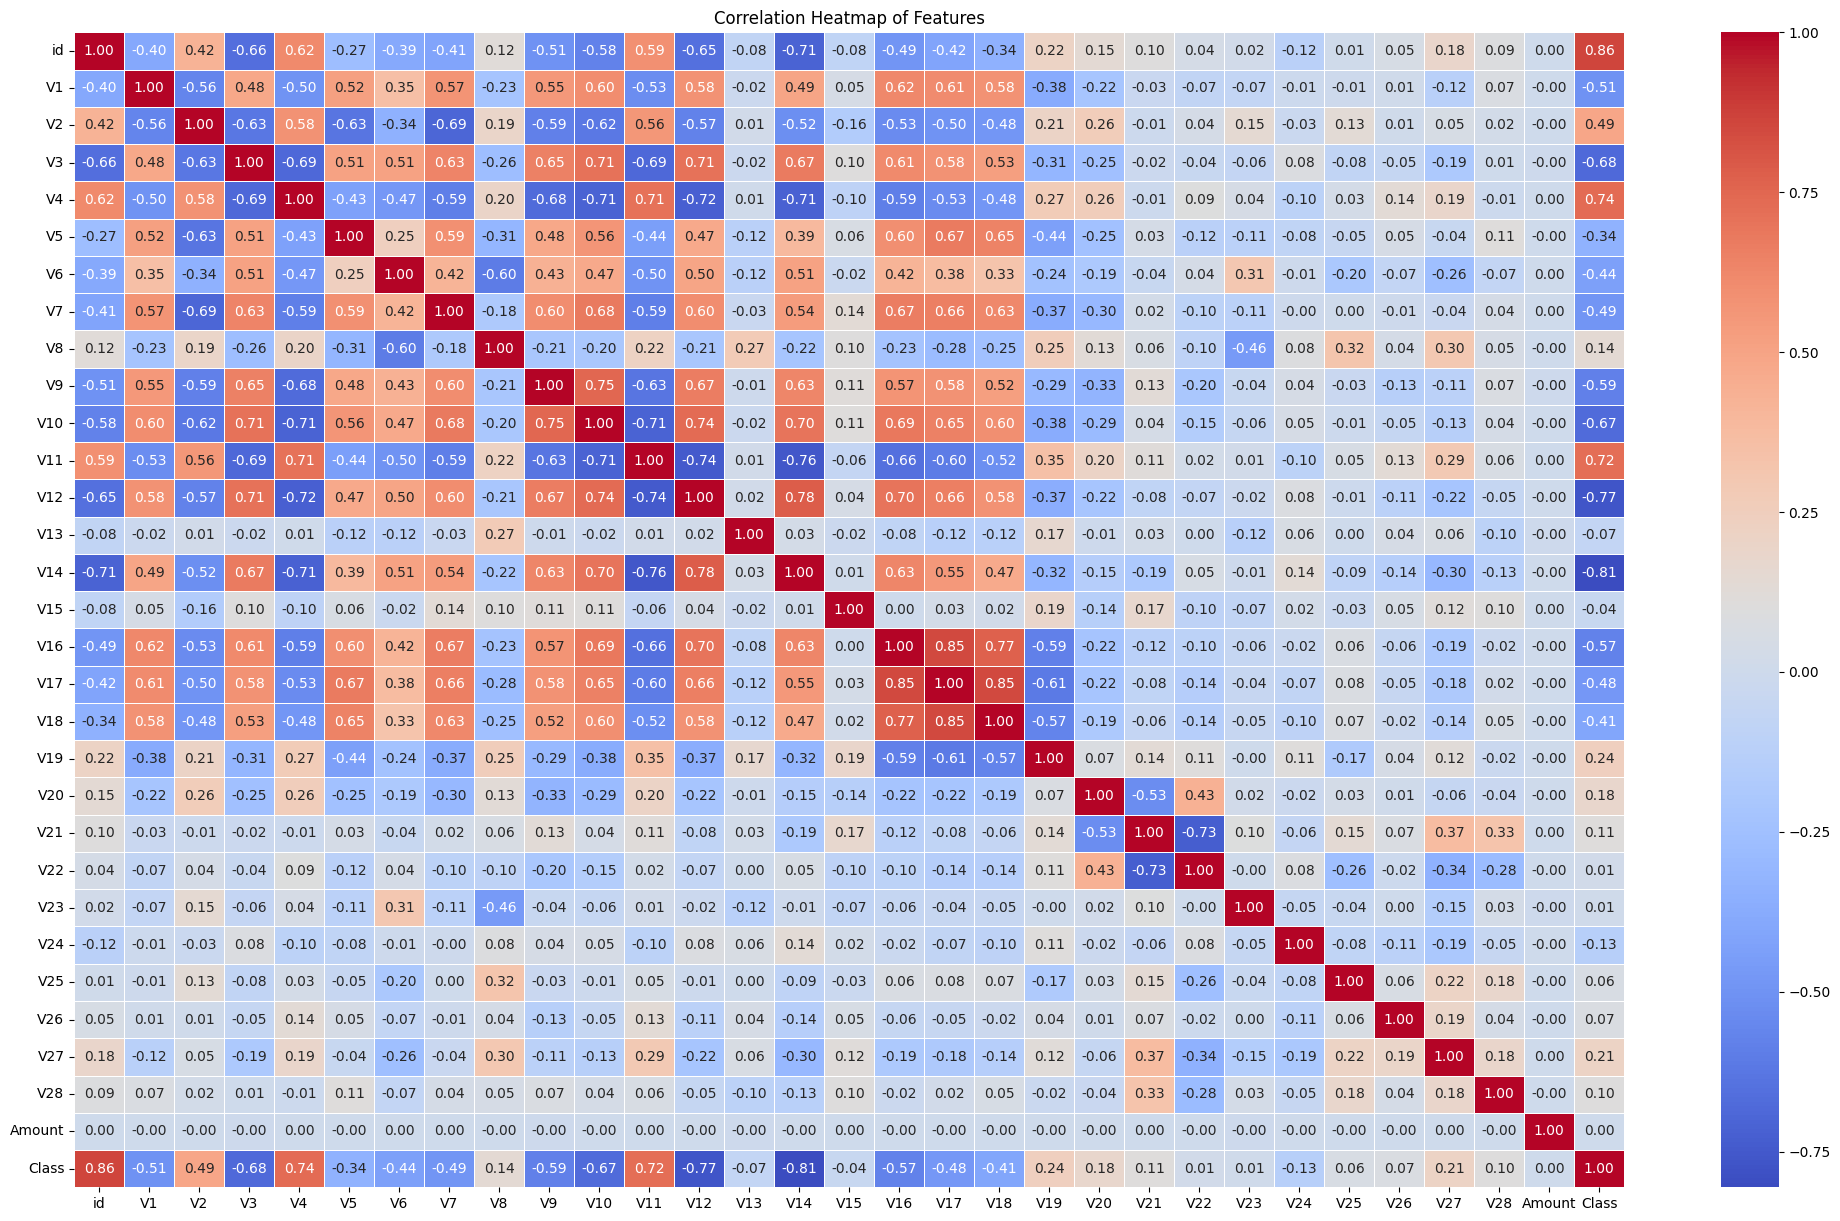

In [153]:
# Compute the correlation matrix
corr_matrix = df.to_pandas().corr()

# Plot the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

### Modeling
#### Logistic Regression

In [94]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

/opt/miniconda3/envs/dextermain/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
# Evaluate Logistic Regression model on training and testing data
train_accuracy = log_reg_model.score(x_train, y_train)
test_accuracy = log_reg_model.score(x_test, y_test)

In [96]:
# Predict on the test set
y_pred_log_reg = log_reg_model.predict(x_test)
y_pred_log_reg

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
# Output the performance of Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
Training Accuracy: 0.9953220899354589
Testing Accuracy: 0.9952927797220219
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85149
           1       1.00      0.99      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix for Logistic Regression:
[[84827   322]
 [  481 84959]]


In [98]:
# Confusion Matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))

Confusion Matrix for Logistic Regression:
[[84827   322]
 [  481 84959]]


#### SVC Model

In [99]:
# Support Vector Classifier works by finding the hyperplane that best separates different classes.
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [100]:
# Predict on the test set
y_pred_svc = svc_model.predict(x_test)

In [101]:
# Output the performance of SVC model
print("\nSVC Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))


SVC Model Performance:
Accuracy: 0.9991675899383899
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [102]:
# Experimenting with different C (regularization) parameter
print("\nTraining SVC model with C=10...")
svc_model_c10 = SVC(C=10)
svc_model_c10.fit(x_train, y_train)
y_pred_svc_c10 = svc_model_c10.predict(x_test)


Training SVC model with C=10...


#### Random Forest Model

In [103]:
# Random Forest is an ensemble model that combines multiple decision trees to improve performance.
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(x_train, y_train)


Training Random Forest model...


RandomForestClassifier(random_state=42)

In [104]:
# Predict on the test set
y_pred_rf = rf_model.predict(x_test)

In [105]:
# Output the performance of Random Forest model
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9998182766766908
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [106]:
# Confusion Matrix for Random Forest
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix for Random Forest:
[[85142     7]
 [   24 85416]]


In [107]:
# Additional evaluation metrics
print("\nAdditional evaluation metrics:")
print(f"Logistic Regression Accuracy: {test_accuracy}")
print(f"SVC Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(f"SVC with C=10 Accuracy: {accuracy_score(y_test, y_pred_svc_c10)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Additional evaluation metrics:
Logistic Regression Accuracy: 0.9952927797220219
SVC Accuracy: 0.9991675899383899
SVC with C=10 Accuracy: 0.9991675899383899
Random Forest Accuracy: 0.9998182766766908


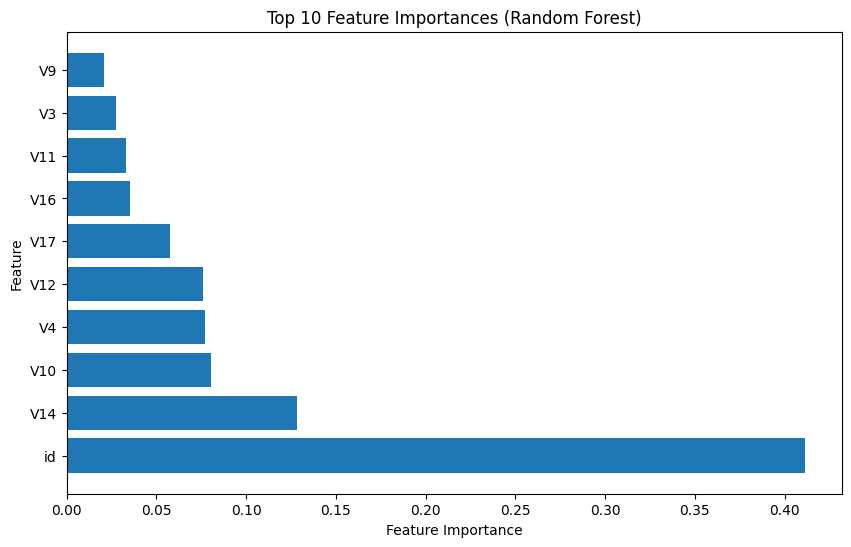

In [108]:
# Plotting feature importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]  # Sorting the features by importance
top_n = 10  # Top 10 important features

plt.figure(figsize=(10, 6))
plt.barh(np.array(x.columns)[sorted_idx[:top_n]], feature_importance[sorted_idx[:top_n]])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

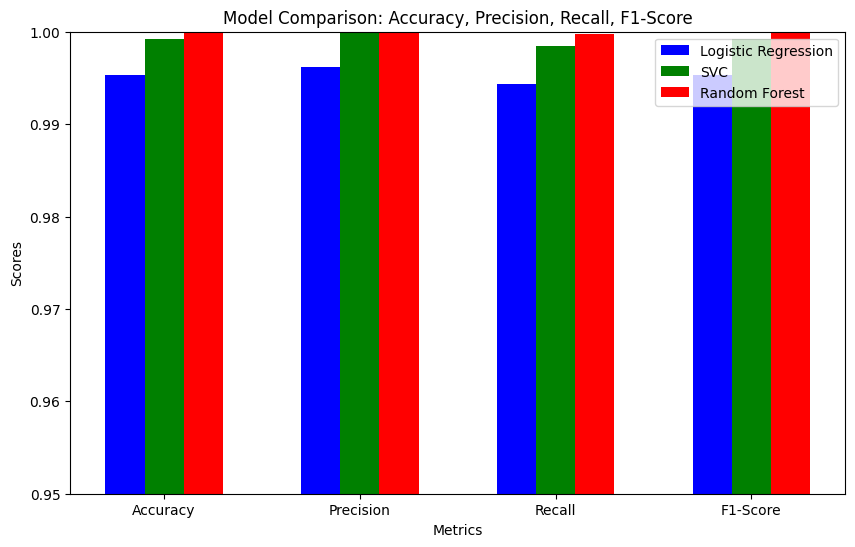

In [155]:
# Logistic Regression
y_pred_log_reg = log_reg_model.predict(x_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# SVC
y_pred_svc = svc_model.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

# Random Forest
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
log_reg_metrics = [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg]
svc_metrics = [accuracy_svc, precision_svc, recall_svc, f1_svc]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]

# Plotting
plt.figure(figsize=(10, 6))
width = 0.2  # Width of the bars
x = np.arange(len(metrics))

plt.bar(x - width, log_reg_metrics, width, label='Logistic Regression', color='blue')
plt.bar(x, svc_metrics, width, label='SVC', color='green')
plt.bar(x + width, rf_metrics, width, label='Random Forest', color='red')

plt.ylim(0.95, 1.0)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(x, metrics)
plt.legend()

plt.show()
